In [1]:
#Import libraries
import numpy as np
import sklearn
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [2]:
#Read the data set
df = pd.read_csv(r'C:\Users\lokit\Downloads\Preprocessed_data.csv')

In [3]:
# Import train_test_split function

from sklearn.model_selection import train_test_split

X=df[['price', 'sqfeet', 'beds', 'baths', 'smoking_allowed', 'wheelchair_access', 'electric_vehicle_charge', 'comes_furnished', 'laundry_options', 'parking_options', 'state','pets_allowed']]  # Features

y=df['type']  # Labels

In [4]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25) # 70% training and 30% test

In [5]:
#import labraries for models
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [6]:
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
knn_clf = KNeighborsClassifier()

In [7]:
from sklearn.model_selection import train_test_split

models = {}

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Tree'] = DecisionTreeClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier()

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier()


#Neural Network

from sklearn.neural_network import MLPClassifier
models['Neural Network'] = MLPClassifier()

In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy, precision, recall = {}, {}, {}

for key in models.keys():
    
    # Fit the classifier model
    models[key].fit(X_train, y_train)
    
    # Prediction 
    predictions = models[key].predict(X_test)
    
    # Calculate Accuracy, Precision and Recall Metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test,average='macro')
    recall[key] = recall_score(predictions, y_test,average='macro')

In [9]:
import pandas as pd

df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model

,Accuracy,Precision,Recall
Decision Tree,0.904695,0.898543,0.898131
Random Forest,0.927368,0.921949,0.922008
Naive Bayes,0.216965,0.249138,0.054333
K-Nearest Neighbor,0.807674,0.800000,0.797304
Neural Network,0.433644,0.419100,0.422347


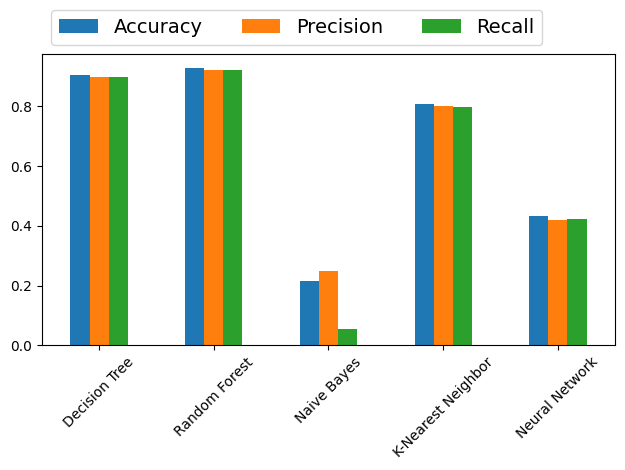

In [10]:
ax  = df_model.plot.bar(rot=45)
ax.legend(ncol= len(models.keys()), bbox_to_anchor=(0, 1), loc='lower left', prop={'size': 14})
plt.tight_layout()

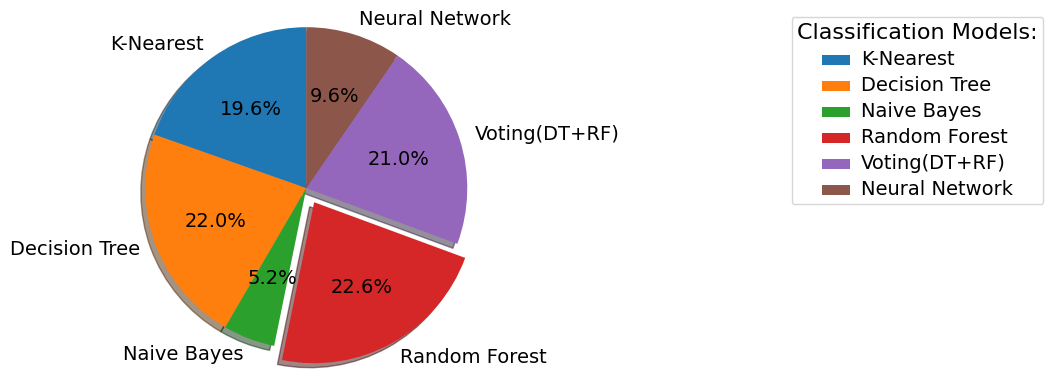

In [11]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'K-Nearest', 'Decision Tree', 'Naive Bayes', 'Random Forest','Voting(DT+RF)','Neural Network'
sizes = [80.6816,90.4874,21.3532,92.9121,86.5000,39.4629]
explode = (0,0,0,0.1,0,0)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90,textprops={'fontsize': 14} )

legend = plt.legend(labels ,title = "Classification Models:" ,bbox_to_anchor=(2,1))

legend.get_title().set_fontsize('16') #legend 'Title' fontsize
plt.setp(plt.gca().get_legend().get_texts(), fontsize='14') #legend 'list' fontsize

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()